## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 6: Procesamiento de Lenguaje Natural**
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 6! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

# Objetivos
- Aplicar el análisis de sentimientos a datos de la vida real.
- Realizar la recolección y análisis de sentimientos con las herramientas de Python.
- Generar diferentes gráficas que ayuden a entender los sentimientos generales del _dataset_.

## Proyecto
Usarás el _dataset_ -> https://www.kaggle.com/datasets/kazanova/sentiment140, que tiene más de 1.6 millones de tuits extraídos con la API de Twitter, para realizar lo siguiente:


1. Hacer todo el preprocesamiento de datos, que incluye:
  - Quitar valores nulos
  - Remover los URL de los tuits
  - Remover números
  - Quitar signos de puntuación
  - Eliminar las palabras de parada

2. Generar una gráfica y una nube de palabras de acuerdo con el _target_ del tuit.

3. Realizar la vectorización de los textos y justificar la elección del vectorizador y optimizador.

4. Entrenar un modelo de clasificación, graficar la matriz de confusión, imprimir la precisión y hacer una prueba con un texto que tú escribas.
  - Puedes seleccionar el vectorizador y los optimizadores de tu preferencia.

5. Entrenar el modelo con un segundo algoritmo de clasificación de tu elección y **escribir** las conclusiones de tus resultados.

  - Debes graficar la matriz de confusión, imprimir la precisión y hacer una prueba en un texto con el nuevo modelo.

**NOTA:** Puedes reducir el tamaño del _dataset_ según tu criterio, con el fin de reducir el tiempo de ejecución o evitar que el COLAB se detenga debido al consumo de RAM.

Mucho éxito y recuerda que en las asesorías semanales e individuales tu _coach_ te ayudará con el proyecto.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones |
| -- | -- | -- |
| Actividad 1. Limpieza | 20 | Realiza las siguientes actividades en el _dataset_: quitar valores nulos. Remover las URL de los tuits. Remover números. Quitar signos de puntuación. Eliminar las palabras de parada.|
| Actividad 2. Análisis inicial | 20 | Debes generar una gráfica con leyendas y títulos adecuados para ser leídos por una persona que no sea del área. Además, debes realizar una nube de palabras por cada sentimiento _target_ que tiene el _dataset_.
| Actividad 3. Vectorización | 20 | Para entrenar el modelo de ML, el texto debe estar vectorizado, por ello, debes realizar la vectorización y justificar tus elecciones. Sin las justificaciones, se descontarán puntos. |
| Actividad 4. Entrenamiento 1 | 20 | Esta sección debe tener las gráficas adecuadas del entrenamiento, con leyendas y títulos correspondientes, la matriz de confusión graficada y explicada, así como la impresión de métricas de performance del modelo elegido. |
| Actividad 5. Entrenamiento 2 | 20 | Esta sección debe tener las gráficas adecuadas del entrenamiento, con leyendas y títulos correspondientes, la matriz de confusión graficada y explicada, así como la impresión de métricas de performance del modelo elegido. |


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
nltk.download('stopwords')
nltk.download('popular')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Down

True

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#intentamos con un 10% de los datos pero la sesion crasheo al momento de ejecutar el modelo, se intenta con un 5% de los datos pero sucedio lo mismo, asi que se realiza con el 3%
DataFrame = pd.read_csv('/content/drive/MyDrive/Ucamp/Modulo6/training.1600000.processed.noemoticon.csv', encoding = "Latin1")
df = DataFrame.sample(frac=0.10, random_state=42)

In [ ]:
df.head(1)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
541200,0,2200003313,Tue Jun 16 18:18:13 PDT 2009,NO_QUERY,DEWGetMeTho77,@Nkluvr4eva My poor little dumpling In Holmde...


In [ ]:
df = df.drop(["1467810369", "Mon Apr 06 22:19:45 PDT 2009", '_TheSpecialOne_', "NO_QUERY"], axis = True)
df.head(2)

,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
541200,0,@Nkluvr4eva My poor little dumpling In Holmde...
750,0,I'm off too bed. I gotta wake up hella early t...


In [ ]:
#Ningun valor es nulo, tomamos el 10% de los datos lo cual equivale a 160000
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160000 entries, 541200 to 427964
Data columns (total 2 columns):
 #   Column                                                                                                               Non-Null Count   Dtype 
---  ------                                                                                                               --------------   ----- 
 0   0                                                                                                                    160000 non-null  int64 
 1   @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  160000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [ ]:
df.columns

Index(['0', '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'], dtype='object')

In [ ]:
#(0 = negative, 2 = neutral, 4 = positive)
df_text = df["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"]
labels = df["0"]

In [ ]:
def pre_texto(text):
    text = text.lower() #Pasar a minusculas
    text = re.sub(r'á', 'a',text) #remover acentos
    text = re.sub(r'é', 'e',text)
    text = re.sub(r'í', 'i',text)
    text = re.sub(r'ó', 'o',text)
    text = re.sub(r'ú', 'u',text)
    text = re.sub(r'http\S+', '',text) #remover url's
    text = re.sub(r'@\S+', '',text) #remover menciones de nombres de usuario
    text = re.sub(r'#\S+', '',text) #romever etiquetas
    text = re.sub(r'[^a-z ñ]',' ',text).strip() #remover signos de puntuacion,carac. esp., números y emoticones
    text = re.sub(r'([^0-9])\1\1+',r'\1',text).strip() #Se eliminan repeticiones mayores a 2 caracteres
    stop_words = set(stopwords.words("english")) #definir stop words
    text = nltk.word_tokenize(text) #Tokenizar
    text = [i for i in text if not i in stop_words] # se elimina las stop words de los textos
    lemmatizer = WordNetLemmatizer() #definimos lematizador
    text = [lemmatizer.lemmatize(word) for word in text]
    return text

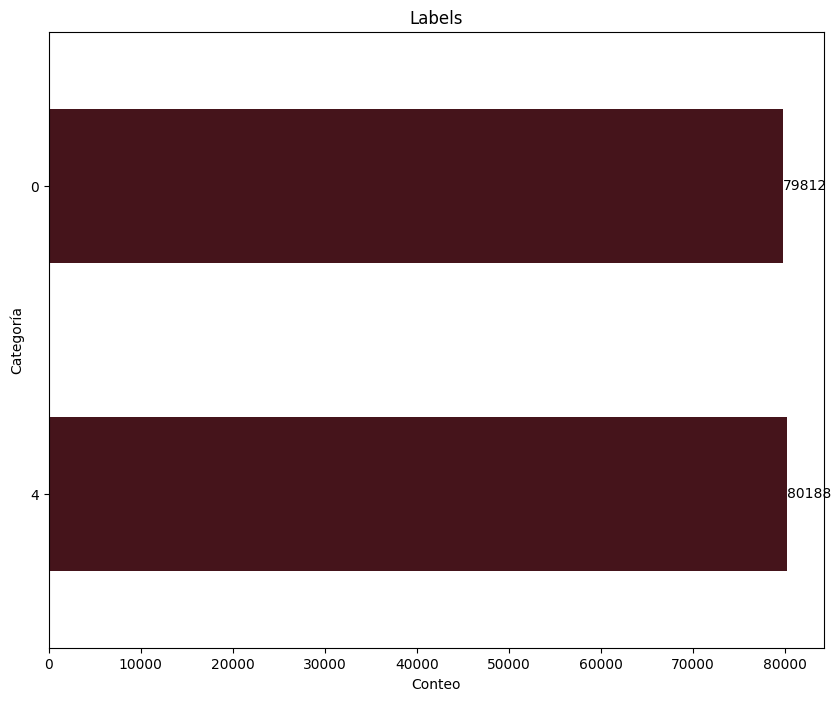

In [ ]:
import seaborn as sns
#nos muestra un porcentaje de casi el 50% para ambas etiquetas
conteo_etiquetas = df["0"].value_counts()

plt.figure(figsize=(10, 8))
grafico = df["0"].value_counts().plot(kind='barh', color='#45141B')

for indice, (etiqueta, valor) in enumerate(conteo_etiquetas.items()):
    grafico.text(valor, indice, str(valor), ha='left', va='center')

plt.title('Labels')
plt.xlabel("Conteo")
plt.ylabel('Categoría')
plt.show()

In [ ]:
#Dividimos el cojunto con train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_text,labels,train_size = 0.80, random_state=19)

In [ ]:
df["text"] = df["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"].apply(pre_texto)

In [ ]:
#podemos ver la nueva columna text con los datos limpios pero en lista
df.head()

,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",text
541200,0,@Nkluvr4eva My poor little dumpling In Holmde...,"[poor, little, dumpling, holmdel, vids, really..."
750,0,I'm off too bed. I gotta wake up hella early t...,"[bed, got, ta, wake, hella, early, tomorrow, m..."
766711,0,I havent been able to listen to it yet My spe...,"[havent, able, listen, yet, speaker, busted]"
285055,0,now remembers why solving a relatively big equ...,"[remembers, solving, relatively, big, equation..."
705995,0,"Ate too much, feel sick","[ate, much, feel, sick]"


In [ ]:
#Convertimos las palabras en secuencias sin una lista separadas por un espacio
df['clean'] = df['text'].apply(lambda x: " ".join([str(word) for word in x]))
df.head()

,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",text,clean
541200,0,@Nkluvr4eva My poor little dumpling In Holmde...,"[poor, little, dumpling, holmdel, vids, really...",poor little dumpling holmdel vids really tryin...
750,0,I'm off too bed. I gotta wake up hella early t...,"[bed, got, ta, wake, hella, early, tomorrow, m...",bed got ta wake hella early tomorrow morning
766711,0,I havent been able to listen to it yet My spe...,"[havent, able, listen, yet, speaker, busted]",havent able listen yet speaker busted
285055,0,now remembers why solving a relatively big equ...,"[remembers, solving, relatively, big, equation...",remembers solving relatively big equation two ...
705995,0,"Ate too much, feel sick","[ate, much, feel, sick]",ate much feel sick


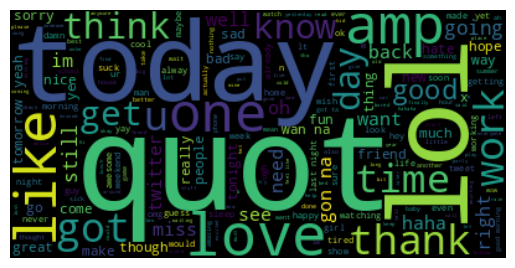

In [ ]:
from wordcloud import WordCloud

# Creamos una lista de palabras de parada
stopwords = set(nltk.corpus.stopwords.words('english'))
textt = " ".join(review for review in df["clean"])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

# **Podmeos ver que en la nube de palabras generales encontramos palabras como love, LOL, like pero tambien existen palabras negativas como hate, bad, sad aunque el peso en la nube es mucho mas bajo, en un analisis inicial podemos ver que los twits son mas positivos que negativos**

In [ ]:
#ahora dividiermos en negativo y positivo para revisar la nube de palabras de cada uno

positive = df[df['0'] == 4]
negative = df[df['0'] == 0]

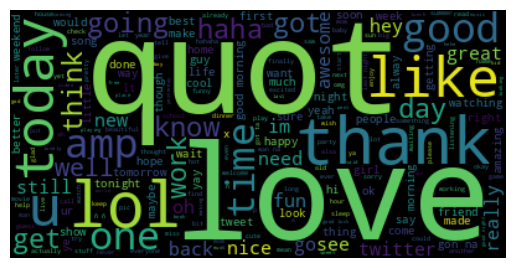

In [ ]:
stopwords = set(nltk.corpus.stopwords.words('english'))
textt = " ".join(review for review in positive["clean"])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

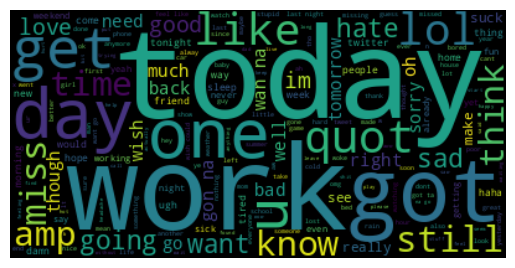

In [ ]:
stopwords = set(nltk.corpus.stopwords.words('english'))
textt = " ".join(review for review in negative["clean"])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

**Vemos una buena division en los datos ya que las nubes de palabras muestra terminos esperados para cada uno de los sentimientos, aunque la palabra "work" esta ampliamente asociada con las frases negativas segun la nube de palabras lo cual es un hallazgo interesante ya que su conotacion no es precisamente negativa**

In [ ]:
#Usamos el vectorizador TF-IDF ya que permite
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect_fit = TfidfVectorizer(min_df=10)


def vectorize(data,tfidf_vect_fit):
    X_tfidf = tfidf_vect_fit.transform(data)
    words = tfidf_vect_fit.get_feature_names_out()
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
    X_tfidf_df.columns = words
    return(X_tfidf_df)


    # def vectorize(data):
    # X_tfidf = tfidf_vect_fit.fit_transform(data)
    # words = tfidf_vect_fit.get_feature_names_out()
    # X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=words)
    # return X_tfidf_df

In [ ]:
#utilizamos como analizador "word" el cual nos puede dar un mejor resultado
tfidf_vect = TfidfVectorizer(analyzer= "word")
tfidf_vect_fit = tfidf_vect.fit(X_train)
X_train = vectorize(X_train,tfidf_vect_fit)

In [ ]:
X_train[['live']]

,live
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
127995,0.0
127996,0.0
127997,0.0
127998,0.0


# Modelo #1

Elegimos logistic regression debido a que da buenos resultados en una clasificaicon binaria y no consume tanta capacidad de computo, con el modelo SVC el modelo tardo demasiado en entrenarse

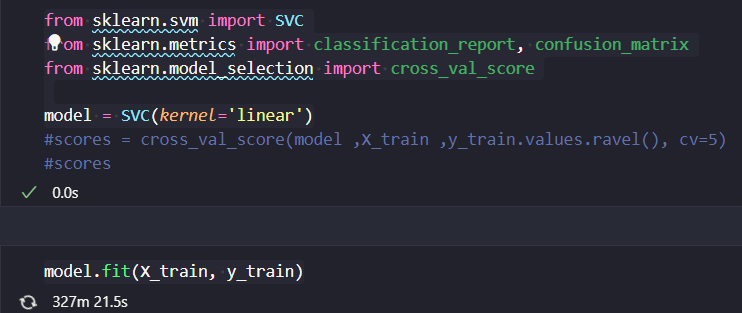



In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [ ]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#Vectorizar el cojunto de testing
X_test = vectorize(X_test, tfidf_vect_fit)

In [ ]:
#generamos una matriz de confusion y tambien traemos las metricas, podemos observar un accurancy de 79%
from sklearn.metrics import confusion_matrix, classification_report


y_pred = model.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Matriz de Confusión:\n", confusion_matrix)
print("\nReporte de Clasificación:\n", class_report)

Matriz de Confusión:
 [[12493  3501]
 [ 3185 12821]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79     15994
           4       0.79      0.80      0.79     16006

    accuracy                           0.79     32000
   macro avg       0.79      0.79      0.79     32000
weighted avg       0.79      0.79      0.79     32000



<Axes: >

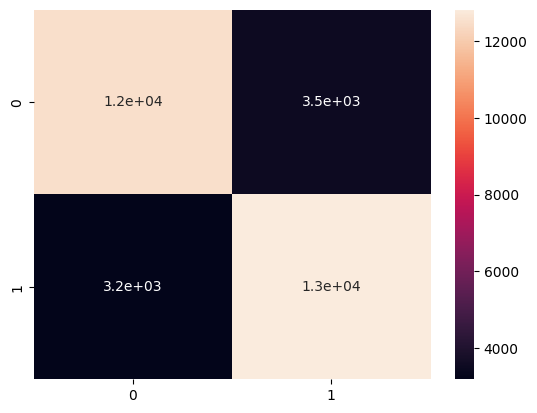

In [ ]:
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
#dio un resultado 4 que significa positivo por lo que acerto el modelo
frase_test = "This is a great day"

# Debemos hacer que nuestro texto de test pase por el mismo proceso que todo el dataset de train
review_convert = tfidf_vect_fit.transform([frase_test])
prediction_test = model.predict(review_convert)
prediction_test

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([4])

# Modelo #2

escogi un modelo MultinominalNB ya que es especializado para datos categoticos usado para conteo de palabras en un analisis

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model2 = MultinomialNB()
model2.fit(X_train, y_train)

MultinomialNB()

In [ ]:
#El resultado de este modelo es de 80% lo cual es una mejora muy pequeña pero suficiente para este proceso
from sklearn.metrics import confusion_matrix, classification_report

y_pred2 = model2.predict(X_test)
confusion_matrix2 = confusion_matrix(y_test, y_pred2)
class_report2 = classification_report(y_test, y_pred2)

print("Matriz de Confusión:\n", confusion_matrix2)
print("\nReporte de Clasificación:\n", class_report)

Matriz de Confusión:
 [[13213  2781]
 [ 4725 11281]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79     15994
           4       0.79      0.80      0.79     16006

    accuracy                           0.79     32000
   macro avg       0.79      0.79      0.79     32000
weighted avg       0.79      0.79      0.79     32000



<Axes: >

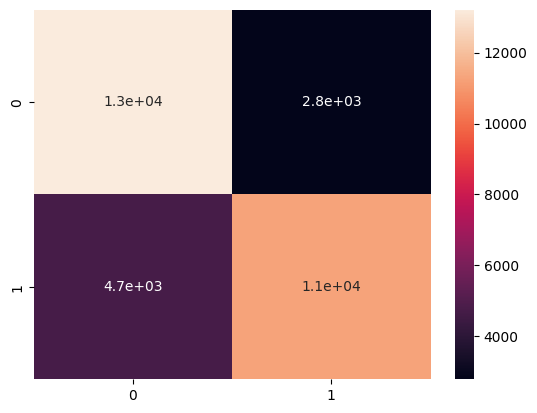

In [ ]:
sns.heatmap(confusion_matrix2, annot=True)

In [ ]:
#dio un resultado 0 que significa negativo por lo que acerto el modelo
frase_test2 = "My day is the worst in all my life"

# Debemos hacer que nuestro texto de test pase por el mismo proceso que todo el dataset de train
review_convert = tfidf_vect_fit.transform([frase_test])
prediction_test = model.predict(review_convert)
prediction_test

array([0])